In [321]:
import numpy as np
import pandas as pd
import seaborn as sns

import math
import matplotlib.pyplot as plt
%matplotlib inline

import warnings ; warnings.filterwarnings('ignore')

파일 다운로드 링크
https://www.kaggle.com/c/bike-sharing-demand/data

### 엑셀파일 불러오기
1. 링크 및 '/' 로 불러오기
2. r'링크'로 불러오기
3. 같은 폴더 선상에 위치해있으면 파일명으로 바로 불러오기

- datetime ~ windspeed 까지(input)의 데이터로 머신러닝을 만들고, casual ~ count 까지(output)가 예측값

In [322]:
train = pd.read_csv('C:/Users/11/python-study/lecture/8월 18일 Numpy/train.csv')
# train = pd.read_csv(r'C:\Users\11\python-study\lecture\8월 18일 Numpy\train.csv')
# train = pd.read_csv('train.csv')
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [323]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


<AxesSubplot:>

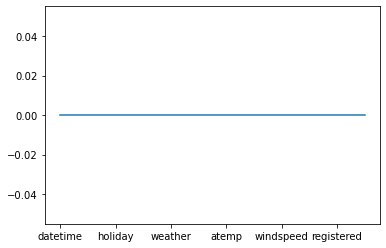

In [324]:
# train 이라는 데이터에 빈 값이 없는지, 시각화로 확인하기.
train.isnull().sum().plot()

## Datetime columns
- datetime = ' 년 / 월 / 일 / 시간 / 분 / 초 / 주(월~일) 컬럼만들기

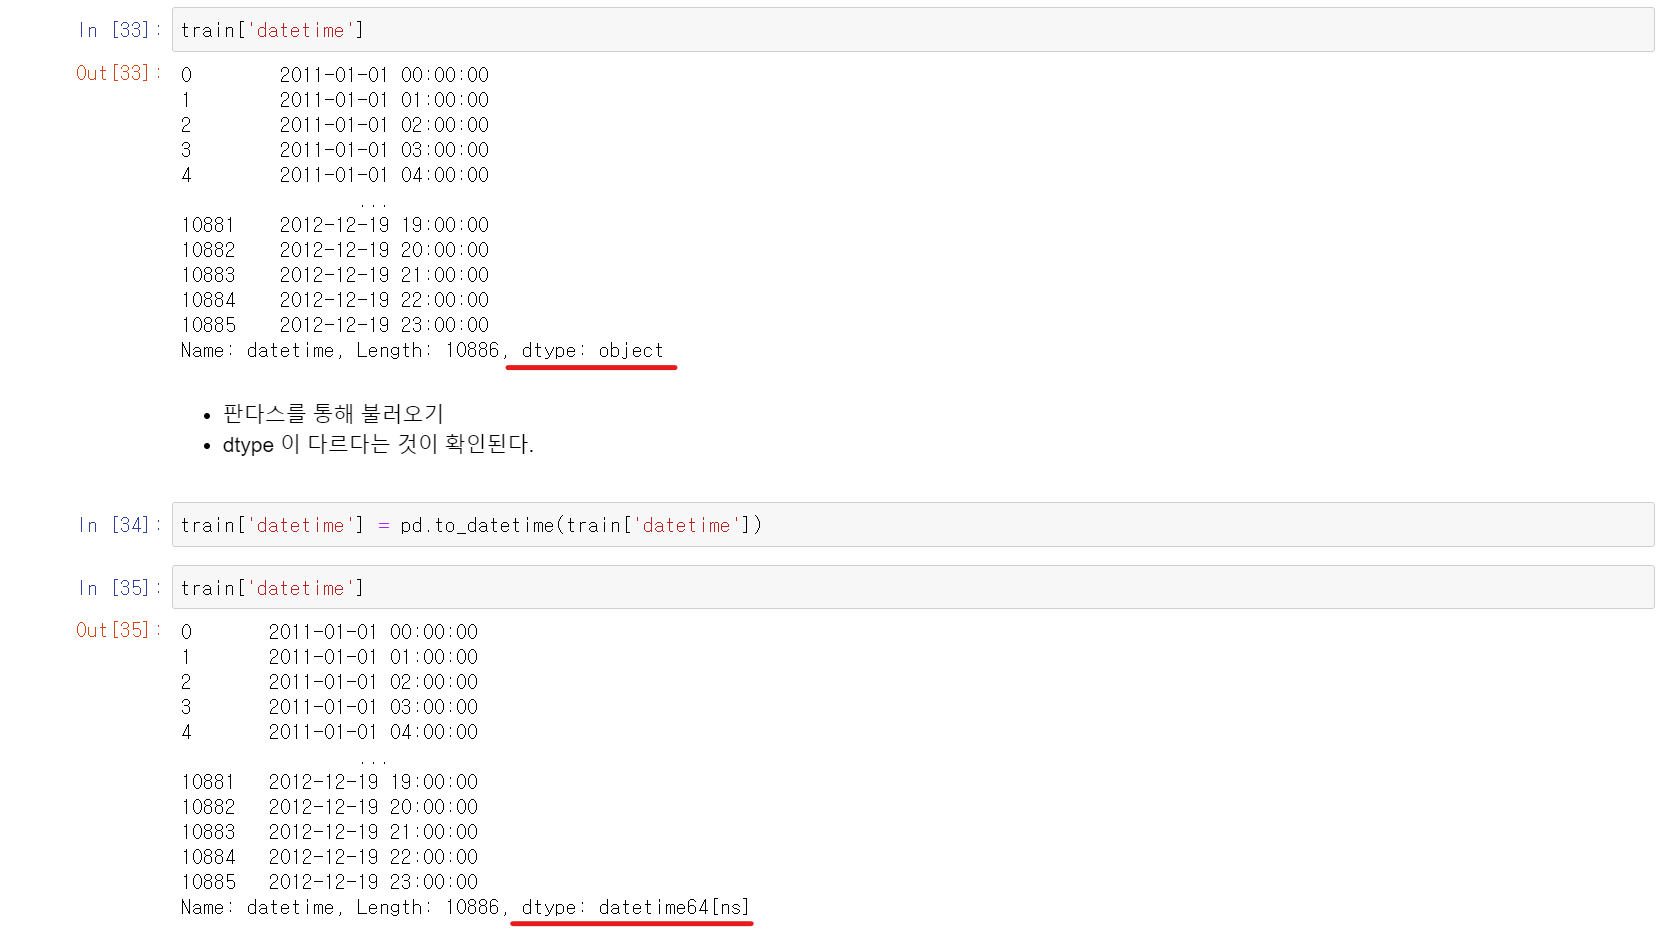

In [325]:
train['datetime']

0        2011-01-01 00:00:00
1        2011-01-01 01:00:00
2        2011-01-01 02:00:00
3        2011-01-01 03:00:00
4        2011-01-01 04:00:00
                ...         
10881    2012-12-19 19:00:00
10882    2012-12-19 20:00:00
10883    2012-12-19 21:00:00
10884    2012-12-19 22:00:00
10885    2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: object

### datetime 추출하기

In [326]:
train['datetime'] = pd.to_datetime(train['datetime'])

In [327]:
train['datetime']

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

### DateTime 에서 칼럼별로 나누기
- <dataframe>['datetime'].dt.<년/월/일 ..... >

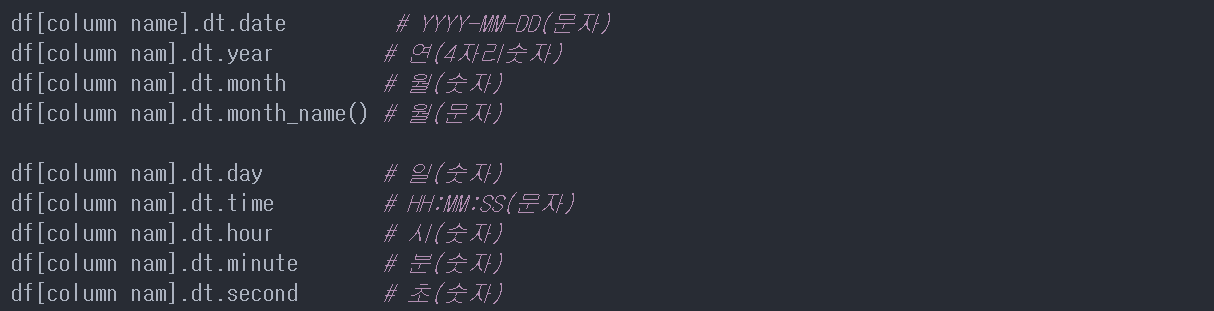

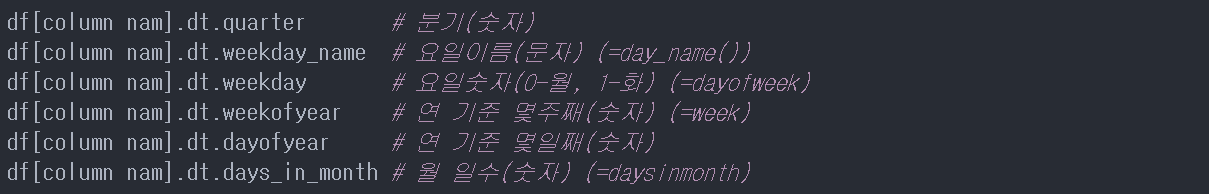

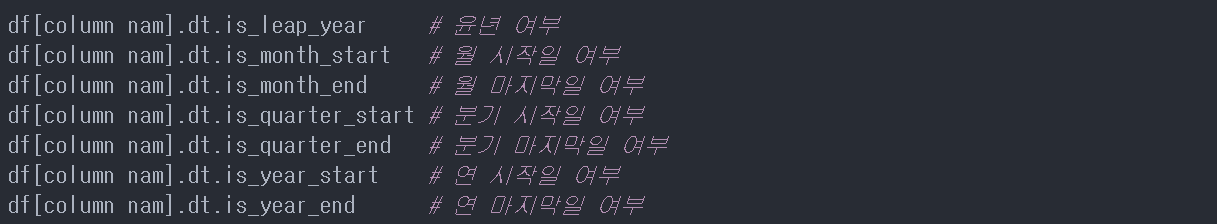

In [328]:
train['datetime_year'] = train['datetime'].dt.year
print(train['datetime_year'].unique())
train['datetime_year']

[2011 2012]


0        2011
1        2011
2        2011
3        2011
4        2011
         ... 
10881    2012
10882    2012
10883    2012
10884    2012
10885    2012
Name: datetime_year, Length: 10886, dtype: int64

In [329]:
train['datetime_month'] = train['datetime'].dt.month
print(train['datetime_month'].unique())
train['datetime_month']

[ 1  2  3  4  5  6  7  8  9 10 11 12]


0         1
1         1
2         1
3         1
4         1
         ..
10881    12
10882    12
10883    12
10884    12
10885    12
Name: datetime_month, Length: 10886, dtype: int64

- 월의 하반기 부터 중반까지 머신러닝을 해라.. 라는 데이터기 때문에 일수가 19일뿐 이다.
-  unique() : 총 몇개의 날이 있는지 확인하는 코드 (즉, 카테고리가 어떤게 있는지 확인)

In [330]:
train['datetime_day'] = train['datetime'].dt.day
print(train['datetime_day'].unique())
train['datetime_day']

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


0         1
1         1
2         1
3         1
4         1
         ..
10881    19
10882    19
10883    19
10884    19
10885    19
Name: datetime_day, Length: 10886, dtype: int64

In [331]:
train['datetime_hour'] = train['datetime'].dt.hour
print(train['datetime_hour'].unique())
train['datetime_hour']

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


0         0
1         1
2         2
3         3
4         4
         ..
10881    19
10882    20
10883    21
10884    22
10885    23
Name: datetime_hour, Length: 10886, dtype: int64

- 아래의 코드에서 unique 는 가치가 없다.
- 여기서 가치가 없다는 뜻은 카테고리. 즉, 데이터가 하나만 있을 시 unique는 의미가 없어진다.

In [332]:
train['datetime_minute'] = train['datetime'].dt.minute
print(train['datetime_minute'].unique())
train['datetime_minute']

[0]


0        0
1        0
2        0
3        0
4        0
        ..
10881    0
10882    0
10883    0
10884    0
10885    0
Name: datetime_minute, Length: 10886, dtype: int64

In [333]:
train['datetime_second'] = train['datetime'].dt.second
print(train['datetime_second'].unique())
train['datetime_second']

[0]


0        0
1        0
2        0
3        0
4        0
        ..
10881    0
10882    0
10883    0
10884    0
10885    0
Name: datetime_second, Length: 10886, dtype: int64

In [334]:
train['datetime_weekday'] = train['datetime'].dt.day_name()
print(train['datetime_weekday'].unique())
train['datetime_weekday']

['Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday']


0         Saturday
1         Saturday
2         Saturday
3         Saturday
4         Saturday
           ...    
10881    Wednesday
10882    Wednesday
10883    Wednesday
10884    Wednesday
10885    Wednesday
Name: datetime_weekday, Length: 10886, dtype: object

#### 가장 많이 쓰는 weekday
- '+ 1' 해주면 월 = 1, 화 = 2, 수 = 3 ... 순으로 정리할 수 있따. (안해주면 0부터 시작)

In [335]:
train['weekday'] = train['datetime'].dt.weekday + 1
print(train['weekday'].unique())
train['weekday']

[6 7 1 2 3 4 5]


0        6
1        6
2        6
3        6
4        6
        ..
10881    3
10882    3
10883    3
10884    3
10885    3
Name: weekday, Length: 10886, dtype: int64

### 날짜 추출 총 정리

In [336]:
train['datetime'] = pd.to_datetime(train['datetime'])
train['datetime_year'] = train['datetime'].dt.year
train['datetime_month'] = train['datetime'].dt.month
train['datetime_day'] = train['datetime'].dt.day
train['datetime_hour'] = train['datetime'].dt.hour
train['datetime_minute'] = train['datetime'].dt.minute
train['datetime_second'] = train['datetime'].dt.second
train['weekday'] = train['datetime'].dt.weekday + 1
train['datetime_weekday'] = train['datetime'].dt.day_name()

train[['datetime', 'datetime_year', 'datetime_month', 'datetime_day',
      'datetime_hour', 'datetime_minute', 'datetime_second', 'weekday', 'datetime_weekday']]

,datetime,datetime_year,datetime_month,datetime_day,datetime_hour,datetime_minute,datetime_second,weekday,datetime_weekday
0,2011-01-01 00:00:00,2011,1,1,0,0,0,6,Saturday
1,2011-01-01 01:00:00,2011,1,1,1,0,0,6,Saturday
2,2011-01-01 02:00:00,2011,1,1,2,0,0,6,Saturday
3,2011-01-01 03:00:00,2011,1,1,3,0,0,6,Saturday
4,2011-01-01 04:00:00,2011,1,1,4,0,0,6,Saturday
...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,2012,12,19,19,0,0,3,Wednesday
10882,2012-12-19 20:00:00,2012,12,19,20,0,0,3,Wednesday
10883,2012-12-19 21:00:00,2012,12,19,21,0,0,3,Wednesday
10884,2012-12-19 22:00:00,2012,12,19,22,0,0,3,Wednesday


# 시각화
- seaborn(sns) : 데이터 시각화할 때 사용한다.

- 출처 : https://seaborn.pydata.org/

- 판다스에서 대표적인 데이터시각화 라이브러리는 seaborn과 matplot 두가지가 있는데, 간단한 시각화는 seaborn으로 할 수 있다. 그러나 seaborn은 간단하다는 점에 반해 복잡한 시각화를 하기에는 불충분하다는 단점이 있고, 이를 복잡하지만 기능이 많은 matplot으로 보충해가며 사용하는 것이 좋을 것이다.

- Seaborn과 Matplot을 불러올 때 한가지 팁으로는 [%matplotlib inline] 라고 코딩을 같이 입력해주는 것이 좋은데, 이는 화면에 시각화된 결과를 바로 띄우라고 커맨드하는 것이다. 이 라인을 생략할 경우, 쥬피터 상에서 시각화된 결과가 바로 안 나올 수 있다.

In [337]:
import seaborn as sns
import matplotlib.pyplot as plt

In [338]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime_year,datetime_month,datetime_day,datetime_hour,datetime_minute,datetime_second,datetime_weekday,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,Saturday,6
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,Saturday,6
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,Saturday,6
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,Saturday,6
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,Saturday,6


## Countplot ( 그래프 )
- 그래프로 행에서의 값의 분포도 확인
- x 축은 행의 갯수, y 축은 횟수를 나타낸다. (countplot은 y축을 쓰지않는다.)

##### 그래프 사이즈 키우기
- plt.figure(figsize=(가로,세로) : 주피터 가로 최대길이는 18 이다.

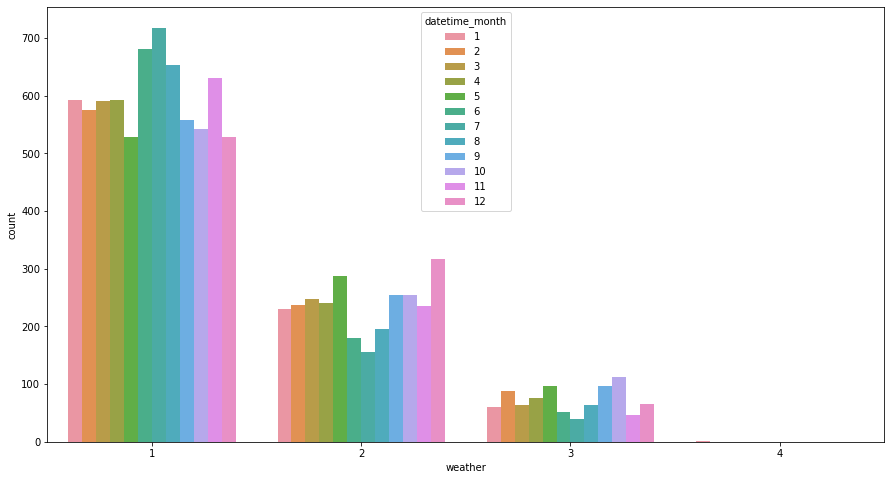

In [339]:
plt.figure(figsize=(15,8))
wh = sns.countplot(data=train, x='weather', hue='datetime_month')

In [340]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime_year,datetime_month,datetime_day,datetime_hour,datetime_minute,datetime_second,datetime_weekday,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,Saturday,6
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,Saturday,6
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,Saturday,6
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,Saturday,6
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,Saturday,6


<AxesSubplot:xlabel='datetime_year', ylabel='count'>

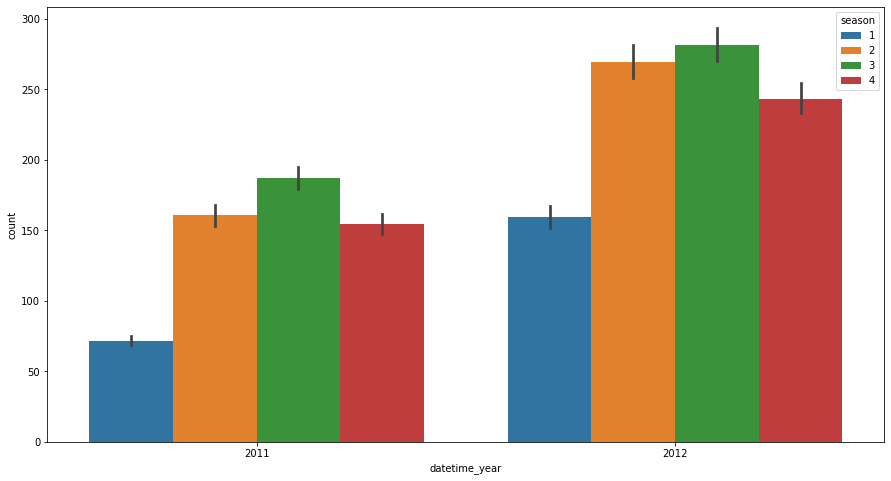

In [341]:
plt.figure(figsize=(15,8))
sns.barplot(data=train, x='datetime_year', y='count', hue='season')

## 두 개의 그래프 생성하기

- Figure : 데이터 박스 ( 컨테이너 박스 )
- ax : axis 의 축약

<AxesSubplot:xlabel='datetime_month', ylabel='count'>

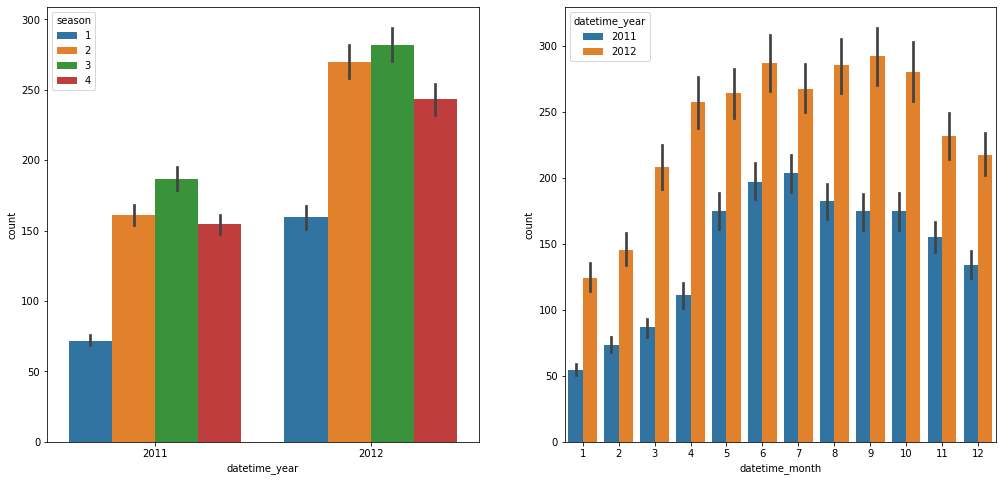

In [342]:
figure,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
figure.set_size_inches(17,8)

sns.barplot(data=train, x='datetime_year', y='count', hue='season', ax=ax1)
sns.barplot(data=train, x='datetime_month', y='count', hue='datetime_year', ax=ax2)

## 네 개의 그래프 생성하기
- plt.subplots(nrows=2, nocls=2) : 2행 2열의 축을 생성

# barplot : 막대그래프

<AxesSubplot:xlabel='datetime_hour', ylabel='count'>

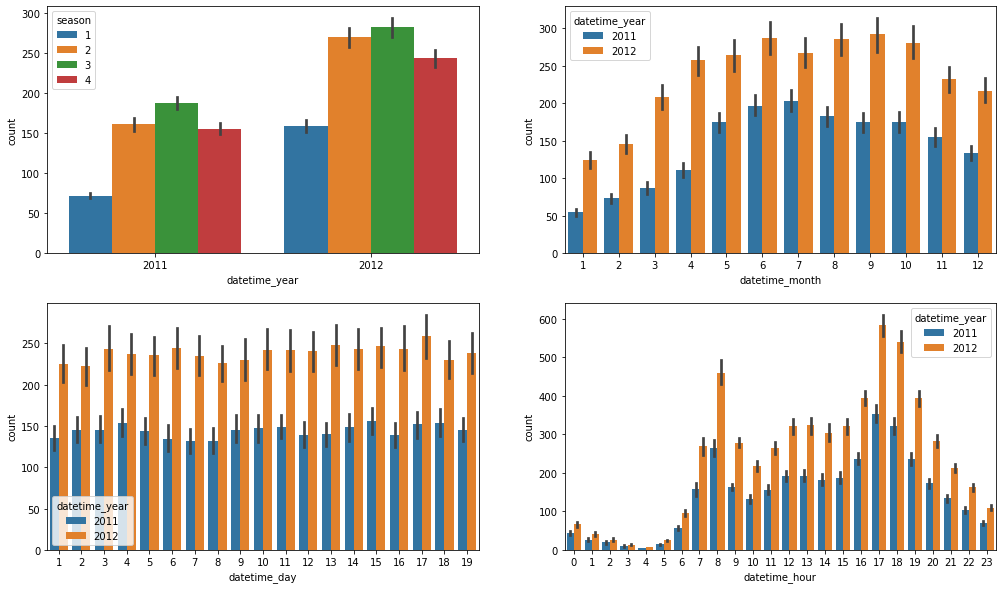

In [343]:
figure,((ax1, ax2),(ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(17,10)

# 1행
sns.barplot(data=train, x='datetime_year', y='count', hue='season', ax=ax1)
sns.barplot(data=train, x='datetime_month', y='count', hue='datetime_year', ax=ax2)

# 2행
sns.barplot(data=train, x='datetime_day', y='count', hue='datetime_year', ax=ax3)
sns.barplot(data=train, x='datetime_hour', y='count', hue='datetime_year', ax=ax4)

In [344]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime_year,datetime_month,datetime_day,datetime_hour,datetime_minute,datetime_second,datetime_weekday,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,Saturday,6
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,Saturday,6
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,Saturday,6
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,Saturday,6
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,Saturday,6


In [345]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'datetime_year', 'datetime_month', 'datetime_day', 'datetime_hour',
       'datetime_minute', 'datetime_second', 'datetime_weekday', 'weekday'],
      dtype='object')

# pointplot : 점 그래프

<AxesSubplot:xlabel='windspeed', ylabel='count'>

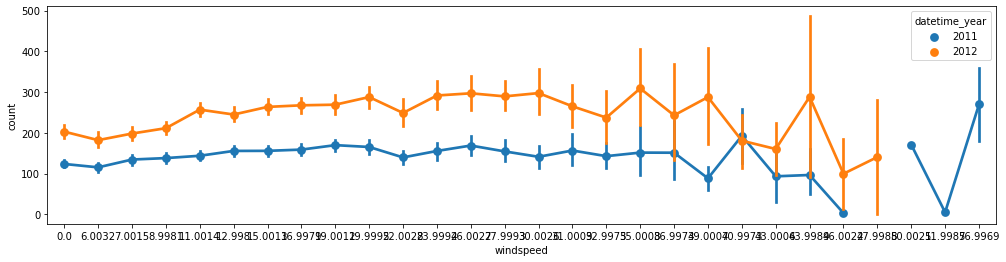

In [346]:
plt.figure(figsize=(17,4))
sns.pointplot(data=train, x='windspeed', y='count', hue='datetime_year')

- 소수점 없애기 ( float을 int로 바꿔줌 )

In [347]:
train['windspeed_int'] = train['windspeed'].astype(int)

<AxesSubplot:xlabel='windspeed_int', ylabel='count'>

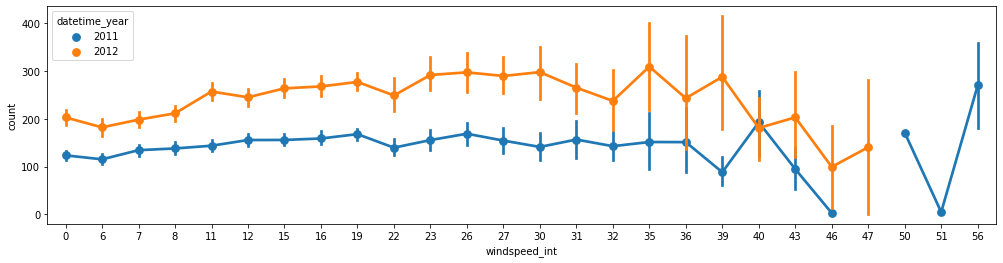

In [348]:
plt.figure(figsize=(17,4))
sns.pointplot(data=train, x='windspeed_int', y='count', hue='datetime_year')

## 두 개의 그래프 생성
- 2행의 1열로 생성

<AxesSubplot:xlabel='windspeed_int', ylabel='count'>

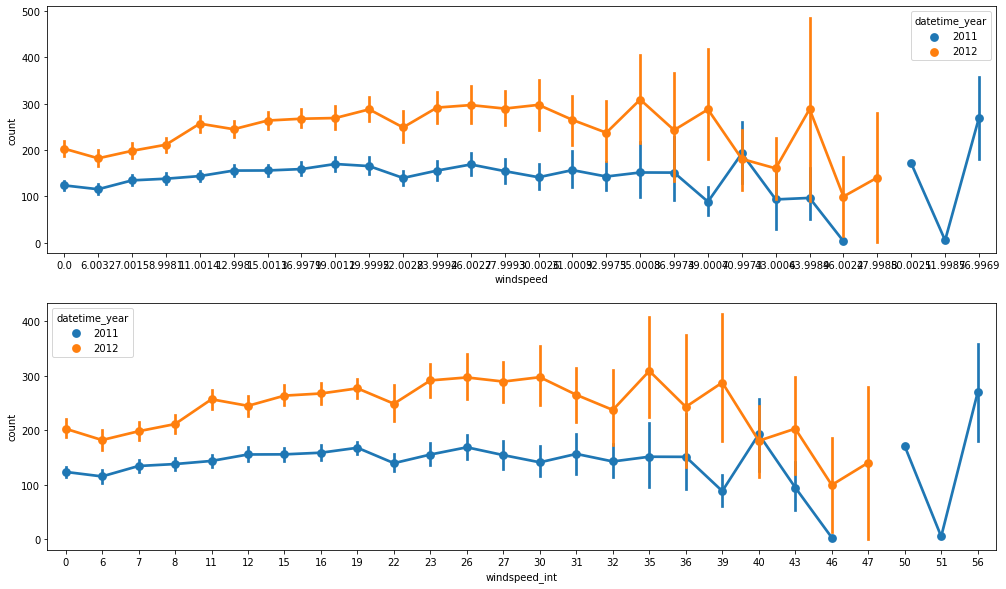

In [349]:
figure,((ax1), (ax2)) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(17,10)

sns.pointplot(data=train, x='windspeed', y='count', hue='datetime_year', ax=ax1)
sns.pointplot(data=train, x='windspeed_int', y='count', hue='datetime_year', ax=ax2)

In [350]:
print(train[(train['windspeed_int']>=0)&(train['windspeed_int']<=10)].shape)
print(train[(train['windspeed_int']>10)&(train['windspeed_int']<=20)].shape)
print(train[(train['windspeed_int']>20)&(train['windspeed_int']<=30)].shape)
print(train[(train['windspeed_int']>30)&(train['windspeed_int']<=40)].shape)
print(train[(train['windspeed_int']>40)].shape)

(4339, 21)
(5052, 21)
(1179, 21)
(287, 21)
(29, 21)


<AxesSubplot:xlabel='datetime_hour', ylabel='count'>

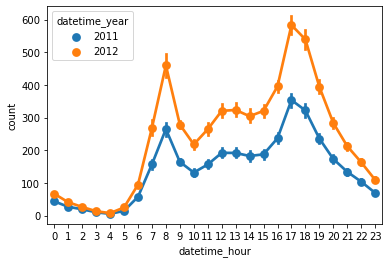

In [351]:
sns.pointplot(data=train, x='datetime_hour', y='count', hue='datetime_year')

## Distplot

<AxesSubplot:xlabel='temp', ylabel='Density'>

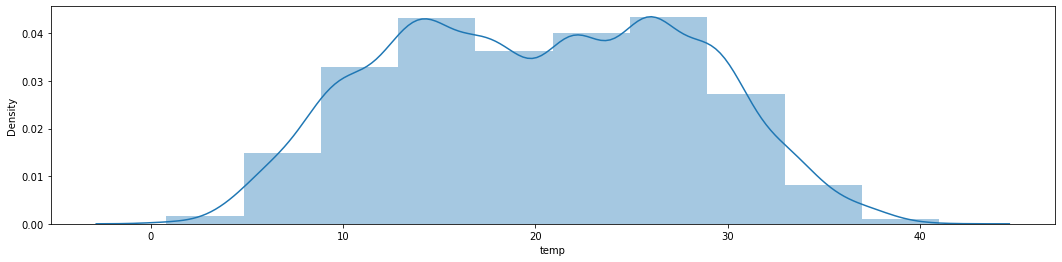

In [352]:
plt.figure(figsize=(18,4))
sns.distplot(train['temp'], hist=True, kde=True, bins=10) #distplot은 컬럼 한개만

<AxesSubplot:xlabel='temp', ylabel='Density'>

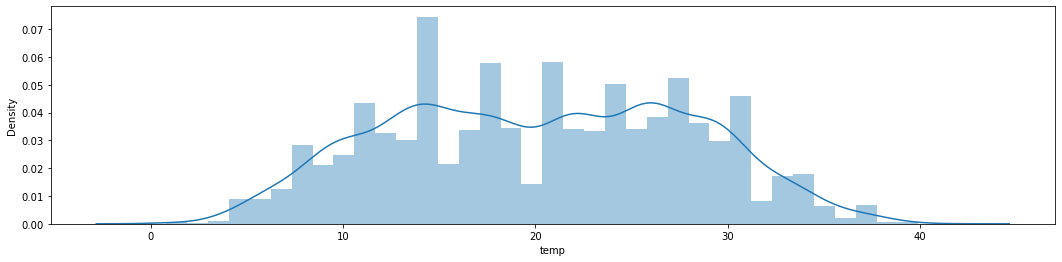

In [353]:
plt.figure(figsize=(18,4))
sns.distplot(train['temp'], hist=True) 

<AxesSubplot:xlabel='atemp', ylabel='Density'>

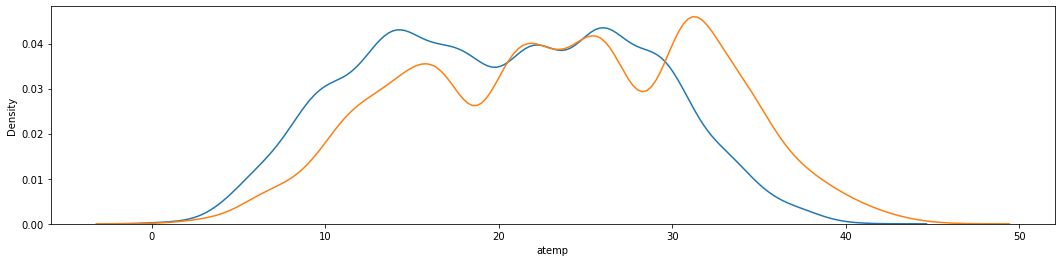

In [354]:
plt.figure(figsize=(18,4))
sns.distplot(train['temp'], hist=False, kde=True, bins=None) 
sns.distplot(train['atemp'], hist=False, kde=True, bins=None) 

### [불쾌지수=1.8x기온–0.55x(1–습도)x(1.8x기온–26)+32]

In [355]:
train["THI"]=1.8*train['temp']-0.55*(1 - 0.01*train['humidity'])*(1.8*train['temp']-26)+32
train[['temp','humidity','THI']]

,temp,humidity,THI
0,9.84,81,50.578096
1,9.02,80,49.310040
2,9.02,80,49.310040
3,9.84,75,50.851600
4,9.84,75,50.851600
...,...,...,...
10881,15.58,50,59.481900
10882,14.76,57,58.433668
10883,13.94,61,57.286766
10884,13.94,61,57.286766


In [356]:
#one-hot-encoding
(train['THI']<68).astype(int).unique()

array([1, 0])

In [357]:
train['THI_1']=(train['THI']<68).astype(int)
train['THI_2']=((train['THI']>=68)&(train['THI']<75)).astype(int)
train['THI_3']=((train['THI']>=75)&(train['THI']<80)).astype(int)
train['THI_4']=(train['THI']>=80).astype(int)

train[(train['THI']>=68)&(train['THI']<75)][['THI','THI_1','THI_2','THI_3','THI_4']]
# train[['THI','THI_1','THI_2','THI_3','THI_4']]

,THI,THI_1,THI_2,THI_3,THI_4
819,69.342740,0,1,0,0
820,69.041120,0,1,0,0
822,68.519304,0,1,0,0
842,70.549220,0,1,0,0
843,72.714784,0,1,0,0
...,...,...,...,...,...
10518,70.090478,0,1,0,0
10660,68.540300,0,1,0,0
10661,68.120650,0,1,0,0
10662,68.180600,0,1,0,0


<AxesSubplot:xlabel='temp', ylabel='Density'>

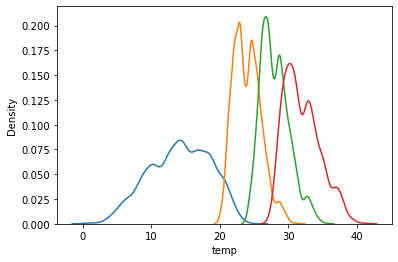

In [358]:
THI_1=train[train['THI_1']==1]
THI_2=train[train['THI_2']==1]
THI_3=train[train['THI_3']==1]
THI_4=train[train['THI_4']==1]
sns.distplot(THI_1['temp'],hist=False)
sns.distplot(THI_2['temp'],hist=False)
sns.distplot(THI_3['temp'],hist=False)
sns.distplot(THI_4['temp'],hist=False)

In [359]:
train.loc[train['THI']<68,'THI_type'] = 1
train.loc[(train['THI']>=68)&(train['THI']<75),'THI_type'] = 2
train.loc[(train['THI']>=75)&(train['THI']<80),'THI_type'] = 3
train.loc[train['THI']>=80,'THI_type'] = 4

train[(train['THI']>=68)]


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,datetime_second,datetime_weekday,weekday,windspeed_int,THI,THI_1,THI_2,THI_3,THI_4,THI_type
819,2011-02-17 14:00:00,1,0,1,1,24.60,31.060,31,15.0013,26,...,0,Thursday,4,15,69.342740,0,1,0,0,2.0
820,2011-02-17 15:00:00,1,0,1,1,24.60,30.305,28,16.9979,15,...,0,Thursday,4,16,69.041120,0,1,0,0,2.0
822,2011-02-17 17:00:00,1,0,1,2,23.78,27.275,32,19.9995,18,...,0,Thursday,4,19,68.519304,0,1,0,0,2.0
842,2011-02-18 13:00:00,1,0,1,1,24.60,31.060,43,12.9980,45,...,0,Friday,5,12,70.549220,0,1,0,0,2.0
843,2011-02-18 14:00:00,1,0,1,1,27.06,31.060,36,19.9995,73,...,0,Friday,5,19,72.714784,0,1,0,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10518,2012-12-04 16:00:00,4,0,1,1,23.78,27.275,49,19.0012,44,...,0,Tuesday,2,19,70.090478,0,1,0,0,2.0
10660,2012-12-10 14:00:00,4,0,1,2,20.50,24.240,94,15.0013,31,...,0,Monday,1,15,68.540300,0,1,0,0,2.0
10661,2012-12-10 15:00:00,4,0,1,2,20.50,24.240,87,11.0014,29,...,0,Monday,1,11,68.120650,0,1,0,0,2.0
10662,2012-12-10 16:00:00,4,0,1,2,20.50,24.240,88,7.0015,37,...,0,Monday,1,7,68.180600,0,1,0,0,2.0


# Scatterplot

In [360]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,datetime_second,datetime_weekday,weekday,windspeed_int,THI,THI_1,THI_2,THI_3,THI_4,THI_type
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,...,0,Saturday,6,0,50.578096,1,0,0,0,1.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,...,0,Saturday,6,0,49.310040,1,0,0,0,1.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,...,0,Saturday,6,0,49.310040,1,0,0,0,1.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,...,0,Saturday,6,0,50.851600,1,0,0,0,1.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,...,0,Saturday,6,0,50.851600,1,0,0,0,1.0


<AxesSubplot:xlabel='THI', ylabel='temp'>

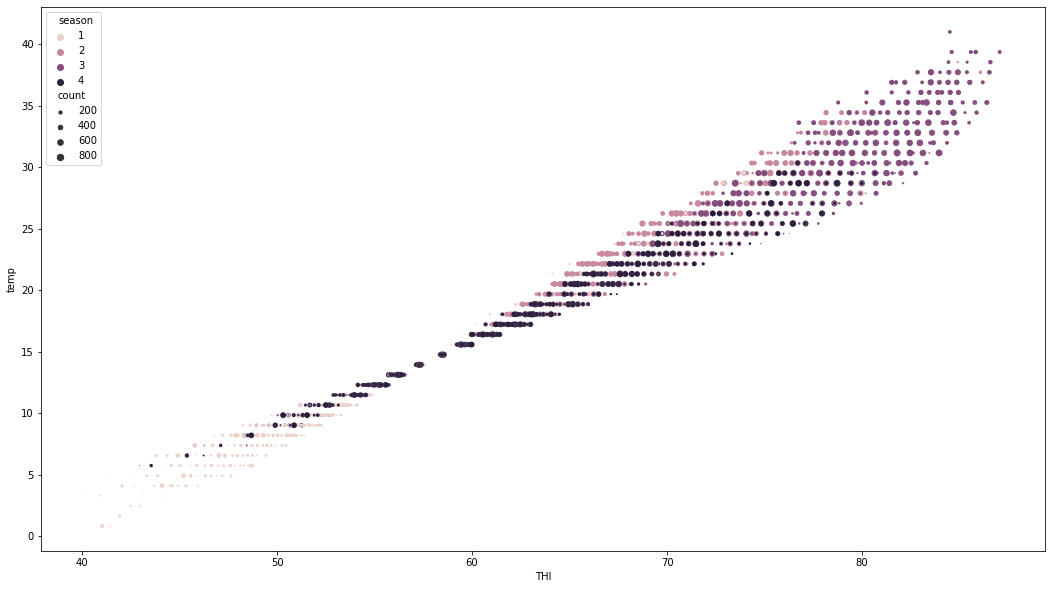

In [361]:
plt.figure(figsize=(18,10))
sns.scatterplot(data=train, x='THI', y='temp', hue='season',size='count',sizes=(0,50))

# Lmplot

<Figure size 1296x720 with 0 Axes>

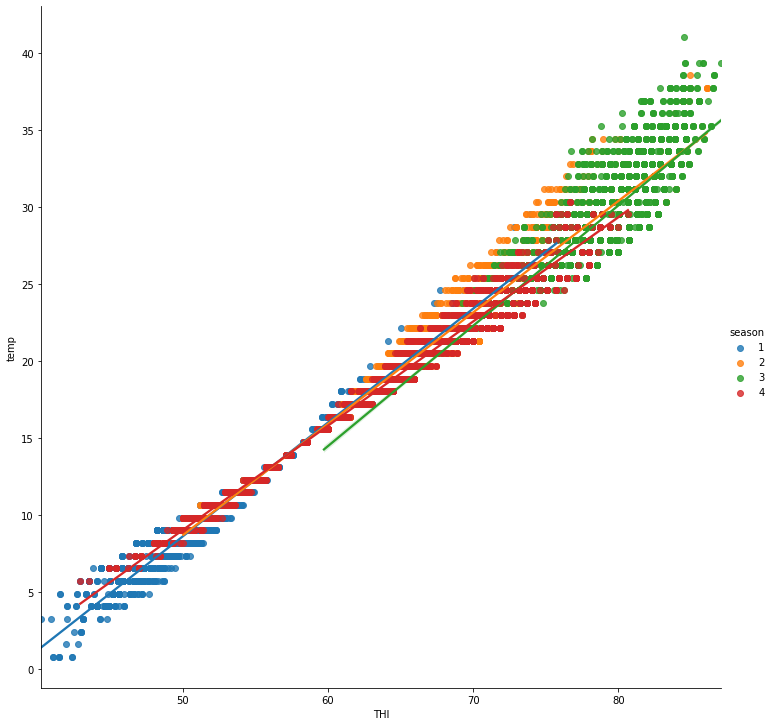

In [362]:
plt.figure(figsize=(18,10))
sns.lmplot(data=train, x='THI', y='temp', hue='season',size=10, fit_reg=True)

<Figure size 1296x720 with 0 Axes>

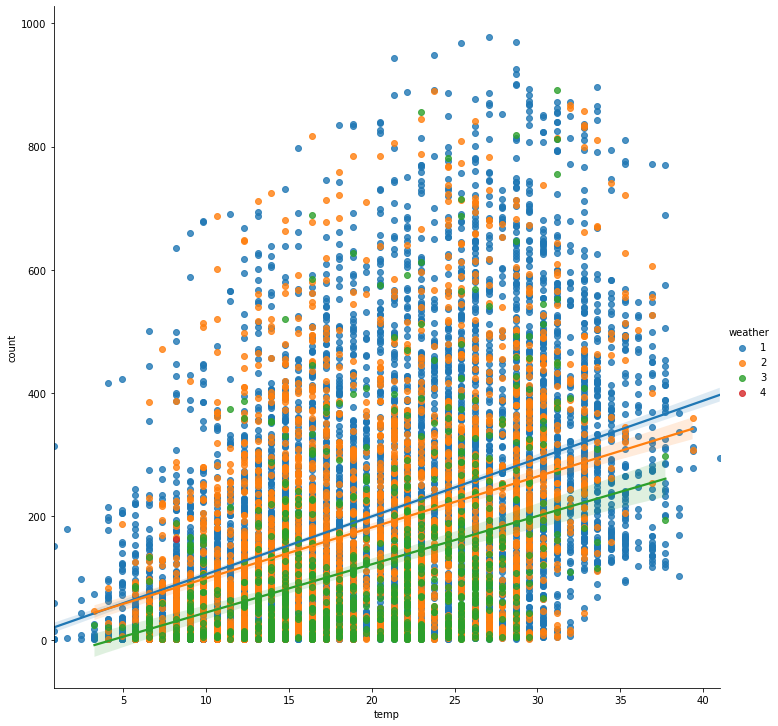

In [363]:
plt.figure(figsize=(18,10))
sns.lmplot(data=train, x='temp', y='count', hue='weather',size=10, fit_reg=True)

In [364]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,datetime_second,datetime_weekday,weekday,windspeed_int,THI,THI_1,THI_2,THI_3,THI_4,THI_type
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,...,0,Saturday,6,0,50.578096,1,0,0,0,1.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,...,0,Saturday,6,0,49.310040,1,0,0,0,1.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,...,0,Saturday,6,0,49.310040,1,0,0,0,1.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,...,0,Saturday,6,0,50.851600,1,0,0,0,1.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,...,0,Saturday,6,0,50.851600,1,0,0,0,1.0


## Heatmap
- 숫자데이터만 분석한다.

In [365]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'datetime_year', 'datetime_month', 'datetime_day', 'datetime_hour',
       'datetime_minute', 'datetime_second', 'datetime_weekday', 'weekday',
       'windspeed_int', 'THI', 'THI_1', 'THI_2', 'THI_3', 'THI_4', 'THI_type'],
      dtype='object')

In [366]:
column = ['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity','datetime_year', 'datetime_month',
       'datetime_day', 'datetime_hour', 'weekday',
       'windspeed_int', 'THI', 'THI_type', 'casual', 'registered', 'count']

train_simple = train[column]
train_simple.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,datetime_year,datetime_month,datetime_day,datetime_hour,weekday,windspeed_int,THI,THI_type,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,2011,1,1,0,6,0,50.578096,1.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,2011,1,1,1,6,0,49.310040,1.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,2011,1,1,2,6,0,49.310040,1.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,2011,1,1,3,6,0,50.851600,1.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,2011,1,1,4,6,0,50.851600,1.0,0,1,1


## 데이터의 상관성

- 행의 데이터와 열의 데이터의 숫자가 높을수록 상관성이 높다.
- 로직 안에 정리되어있는 데이터로 표현하는 것이기 때문에 표현 되지 않는 상관성이 높은 데이터값은 찾아서 넣어줘야한다.

In [367]:
train_simple.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,datetime_year,datetime_month,datetime_day,datetime_hour,weekday,windspeed_int,THI,THI_type,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.004797,0.971524,0.001729,-0.006546,-0.010553,-0.146594,0.272562,0.186884,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.012021,0.001731,-0.015877,-0.000354,-0.191832,0.008952,0.006491,0.027590,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,-0.002482,-0.003394,0.009829,0.002780,-0.704267,0.013517,0.029932,0.018701,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,-0.012548,0.012144,-0.007890,-0.022740,-0.047692,0.006684,-0.019032,-0.035444,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,0.061226,0.257589,0.015551,0.145430,-0.038466,-0.019852,0.986839,0.868705,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,0.058540,0.264173,0.011866,0.140343,-0.040235,-0.059384,0.973671,0.840221,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.078606,0.204537,-0.011335,-0.278011,-0.026507,-0.318133,0.034579,0.024507,-0.348187,-0.265458,-0.317371
datetime_year,-0.004797,0.012021,-0.002482,-0.012548,0.061226,0.058540,-0.078606,1.000000,-0.004932,0.001800,-0.004234,-0.003785,-0.015916,0.053065,0.021364,0.145241,0.264265,0.260403
datetime_month,0.971524,0.001731,-0.003394,0.012144,0.257589,0.264173,0.204537,-0.004932,1.000000,0.001974,-0.006818,-0.002266,-0.149529,0.273621,0.181704,0.092722,0.169451,0.166862
datetime_day,0.001729,-0.015877,0.009829,-0.007890,0.015551,0.011866,-0.011335,0.001800,0.001974,1.000000,0.001132,-0.011070,0.036094,0.019782,-0.031735,0.014109,0.019111,0.019826


In [368]:
train_simple.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'datetime_year', 'datetime_month', 'datetime_day',
       'datetime_hour', 'weekday', 'windspeed_int', 'THI', 'THI_type',
       'casual', 'registered', 'count'],
      dtype='object')

In [2]:
figure,(ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(17,5)
sns.heatmap(train_simple.corr().loc["season":"humidity", "casual":"count"], ax=ax1)
sns.heatmap(train_simple.corr().loc["datetime_year":"THI_type", "casual":"count"], ax=ax2)

NameError: name 'plt' is not defined

## Boxplot

<AxesSubplot:xlabel='THI_type', ylabel='count'>

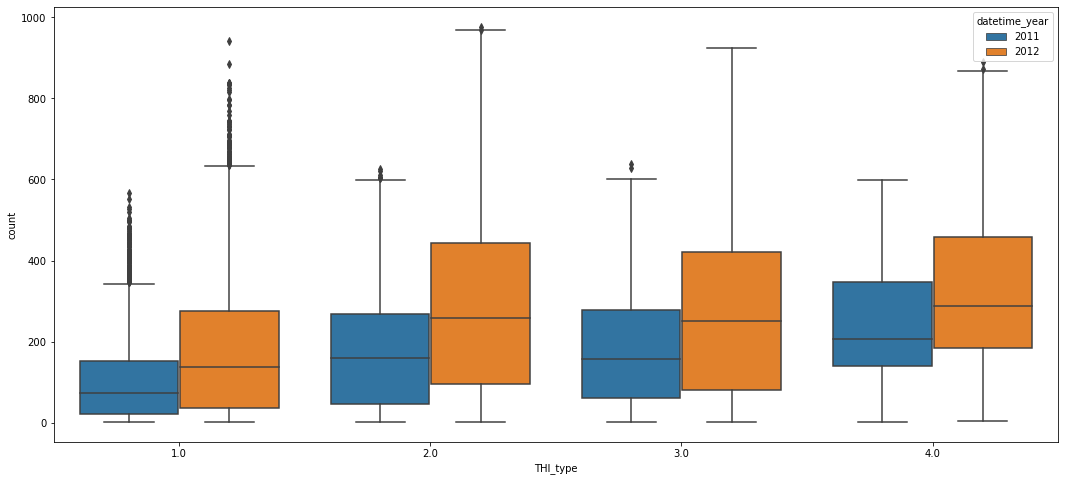

In [370]:
plt.figure(figsize=(18,8))
sns.boxplot(data=train, x='THI_type', y='count', hue='datetime_year')

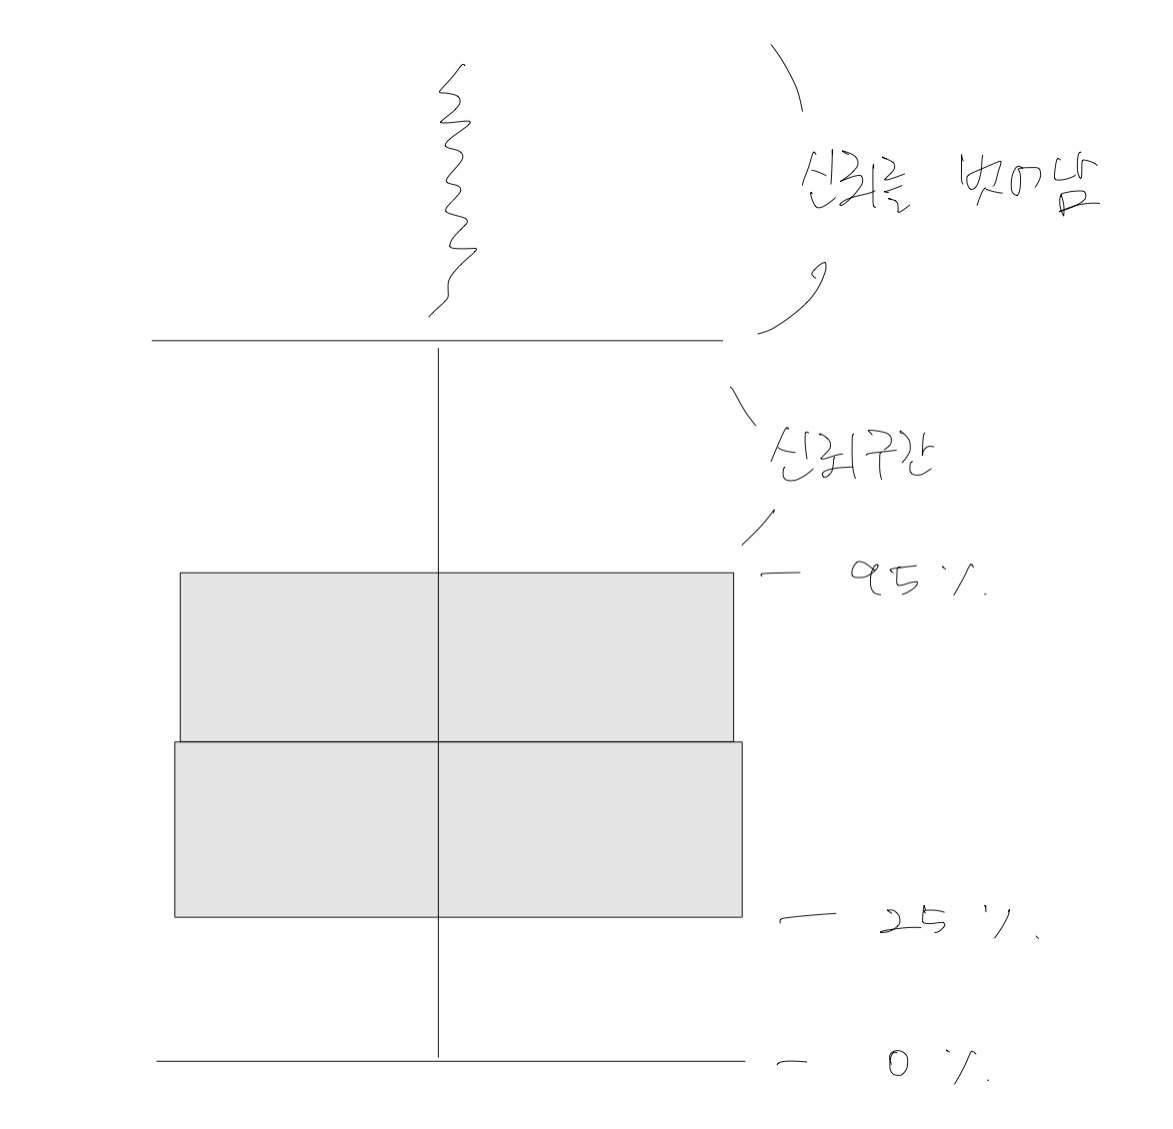

## Violinplot
- split 이 포함된다. False 로 하면 컬럼 하나의 데이터가 데칼코마니로 나오고, True 로 하면 칼럼 두개의 데이터가 합쳐져서 나온다.
- 분포를 자세히 볼수 있다는 장점 말고는 잘 쓰지 않는다.

<AxesSubplot:xlabel='THI_type', ylabel='count'>

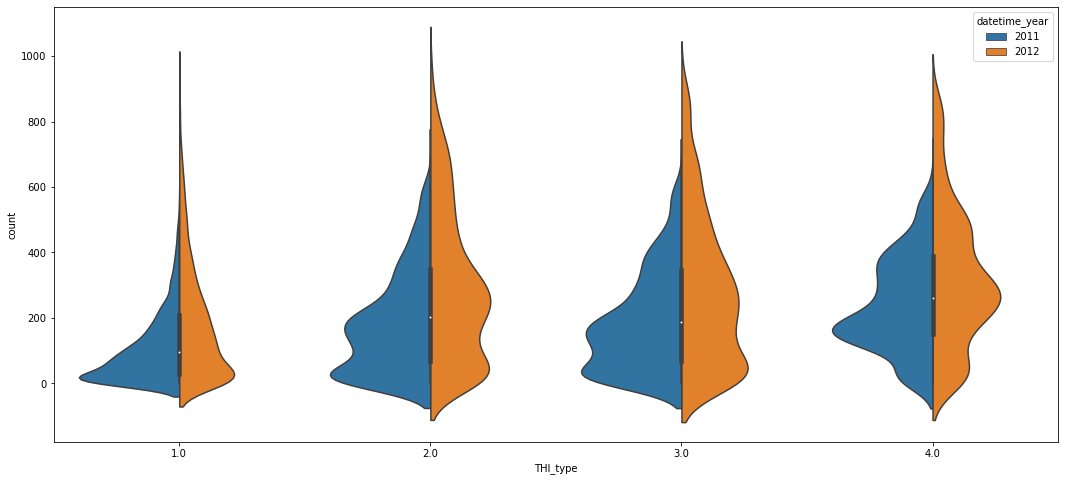

In [371]:
plt.figure(figsize=(18,8))
sns.violinplot(data=train, x='THI_type', y='count', hue='datetime_year', split=True)

# 문제 풀이

1. test.csv 파일을 아래와 같이 불러오세요.
![문제1](문제1.jpg)

In [372]:
# code를 적으세요.
test = pd.read_csv("test.csv")

In [373]:
pd.DataFrame(test)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981


2. test.csv 파일을 활용하여 아래와 같이 도출해보세요.
![문제2](문제2.jpg)

In [374]:
# code를 적으세요
test.info()
print(test.sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB
datetime      2011-01-20 00:00:002011-01-20 01:00:002011-01-...
season                                                    16189
holiday                                                     189
workingday                                                 4453
weather                                                    9329
temp                                                   1338

3. test.csv 파일을 활용하여 datetime 컬럼을 추가해보세요.
![문제3](문제3.jpg)

In [375]:
# code를 적으세요.
test['datetime'] = pd.to_datetime(test['datetime'])

test['datetime_year'] = test['datetime'].dt.year
test['datetime_month'] = test['datetime'].dt.month
test['datetime_day'] = test['datetime'].dt.day
test['datetime_hour'] = test['datetime'].dt.hour
test['datetime_minute'] = test['datetime'].dt.minute
test['datetime_second'] = test['datetime'].dt.second
test['datetime_weekday'] = test['datetime'].dt.day_name()
test['weekday'] = test['datetime'].dt.weekday

test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'datetime_year', 'datetime_month',
       'datetime_day', 'datetime_hour', 'datetime_minute', 'datetime_second',
       'datetime_weekday', 'weekday'],
      dtype='object')

In [376]:
test[['datetime','datetime_year', 'datetime_month',
       'datetime_day', 'datetime_hour', 'datetime_minute', 'datetime_second',
       'datetime_weekday', 'weekday']].head()

,datetime,datetime_year,datetime_month,datetime_day,datetime_hour,datetime_minute,datetime_second,datetime_weekday,weekday
0,2011-01-20 00:00:00,2011,1,20,0,0,0,Thursday,3
1,2011-01-20 01:00:00,2011,1,20,1,0,0,Thursday,3
2,2011-01-20 02:00:00,2011,1,20,2,0,0,Thursday,3
3,2011-01-20 03:00:00,2011,1,20,3,0,0,Thursday,3
4,2011-01-20 04:00:00,2011,1,20,4,0,0,Thursday,3


4-1. train 데이터를 활용하여 아래 그래프를 도출해보세요.
![문제4](문제4.jpg)

<AxesSubplot:xlabel='datetime_hour', ylabel='count'>

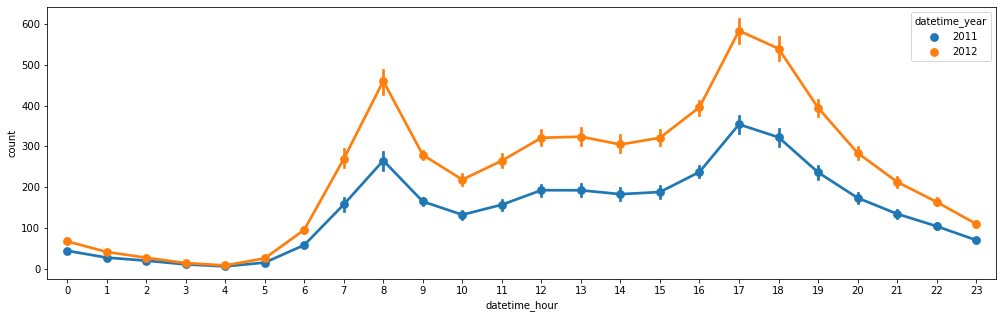

In [377]:
# code를 적으세요.
plt.figure(figsize=(17,5))
sns.pointplot(data=train, x='datetime_hour', y='count', hue='datetime_year')

4-2. train 데이터를 활용하여 아래 그래프를 도출해보세요.
![문제4-2](문제4-2.jpg)

<AxesSubplot:xlabel='datetime_hour', ylabel='count'>

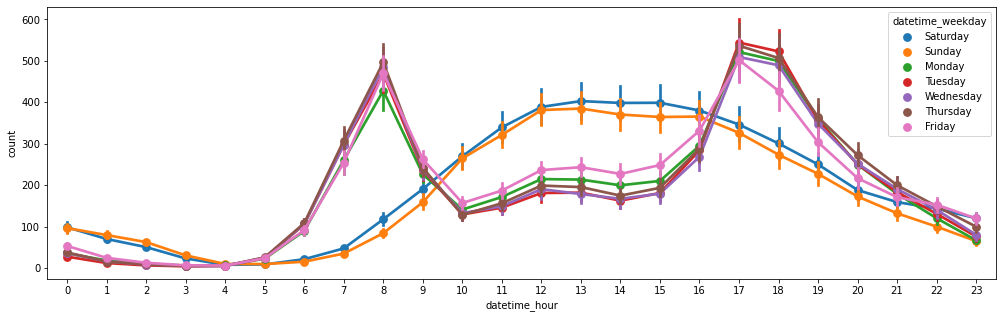

In [378]:
# code를 적으세요.
plt.figure(figsize=(17,5))
sns.pointplot(data=train, x='datetime_hour', y='count', hue='datetime_weekday')

4-3. train 데이터를 활용하여 아래 그래프를 도출해보세요.
![문제4-3](문제4-3.jpg)

<AxesSubplot:xlabel='datetime_hour', ylabel='casual'>

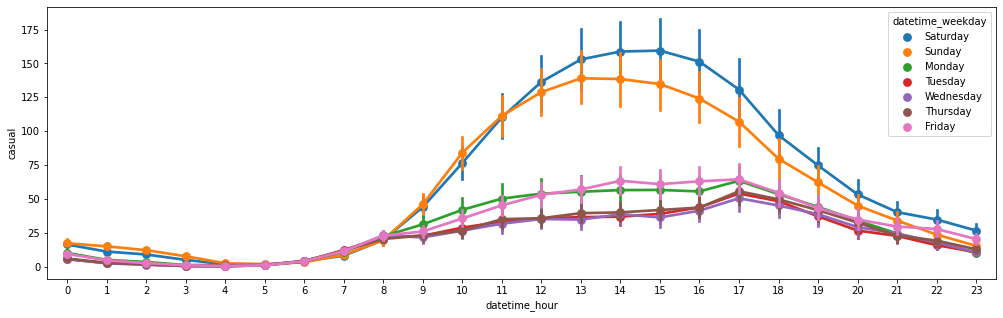

In [379]:
# code를 적으세요.
plt.figure(figsize=(17,5))
sns.pointplot(data=train, x='datetime_hour', y='casual', hue='datetime_weekday')

4-4. train 데이터를 활용하여 아래 그래프를 도출해보세요.
![문제4-4](문제4-4.jpg)

<AxesSubplot:xlabel='datetime_hour', ylabel='registered'>

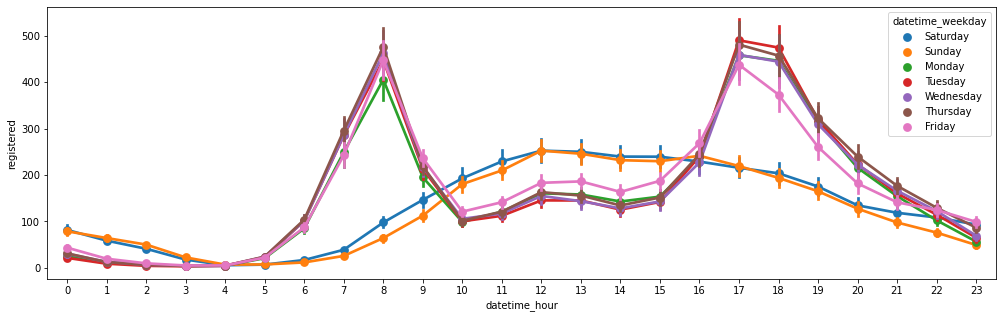

In [380]:
# code를 적으세요.
plt.figure(figsize=(17,5))
sns.pointplot(data=train, x='datetime_hour', y='registered', hue='datetime_weekday')

5. train 데이터를 활용하여 아래 그래프를 도출해보세요.
![문제5](문제5.jpg)

<AxesSubplot:xlabel='windspeed', ylabel='Density'>

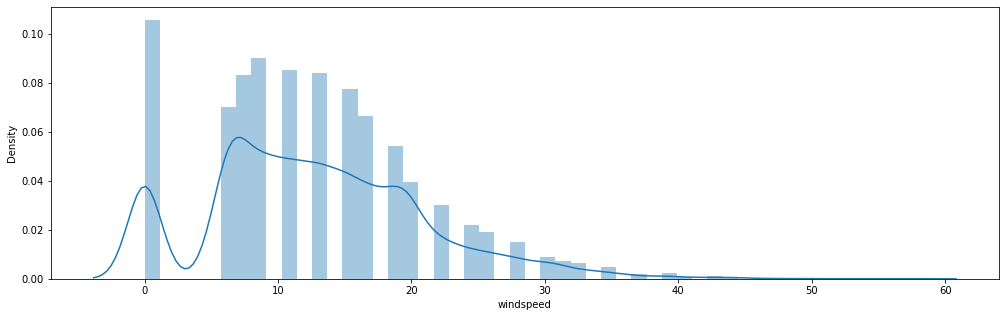

In [381]:
# code를 적으세요.
plt.figure(figsize=(17,5))
sns.distplot(train['windspeed'], hist=True, kde=True, bins=50)

6-1. train 데이터를 활용하여 아래 그래프를 도출해보세요.
![문제6](문제6.jpg)

<AxesSubplot:xlabel='temp', ylabel='atemp'>

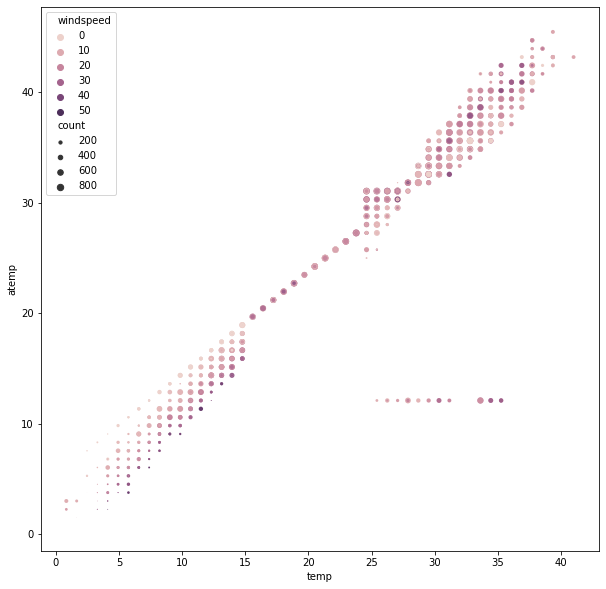

In [382]:
# code를 적으세요.
plt.figure(figsize=(10,10))
sns.scatterplot(data=train, x='temp', y='atemp', hue='windspeed', size='count', sizes=(0, 50))

6-2. train 데이터를 활용하여 아래 그래프를 도출해보세요.
![문제6-2](문제6-2.jpg)

<Figure size 720x720 with 0 Axes>

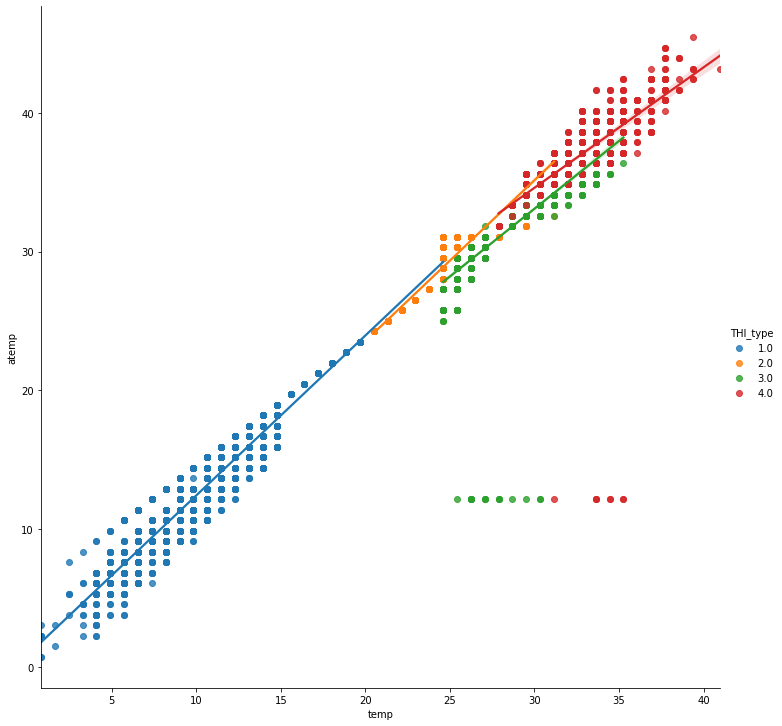

In [383]:
# code를 적으세요.
plt.figure(figsize=(10,10))
sns.lmplot(data=train, x='temp', y='atemp', hue='THI_type',size=10)

7. train 데이터를 활용하여 temp 와 atemp을 빼서 temp(diff)을 구하고 astype()을 활용하여 아래와 같은 dataframe을 도출해보세요.
![문제7](문제7.jpg)

In [1]:
# # code를 적으세요.
train['temp(diff)'] = train['temp'] - train['atemp']
train['temp(diff)'] = train['temp(diff)'].astype(int)

train.loc[train['temp(diff)']>0, 'temp(diff)'] = 0

plt.figure(figsize=(18,4))
sns.pointplot(data=train, x='temp(diff)', y='count')

NameError: name 'train' is not defined

In [385]:
train[['temp','atemp','temp(diff)']]

,temp,atemp,temp(diff)
0,9.84,14.395,-4
1,9.02,13.635,-4
2,9.02,13.635,-4
3,9.84,14.395,-4
4,9.84,14.395,-4
...,...,...,...
10881,15.58,19.695,-4
10882,14.76,17.425,-2
10883,13.94,15.910,-1
10884,13.94,17.425,-3


8. train 데이터를 활용하여 아래 그래프를 도출해보세요.
![문제8](문제8.jpg)

<AxesSubplot:xlabel='temp(diff)', ylabel='count'>

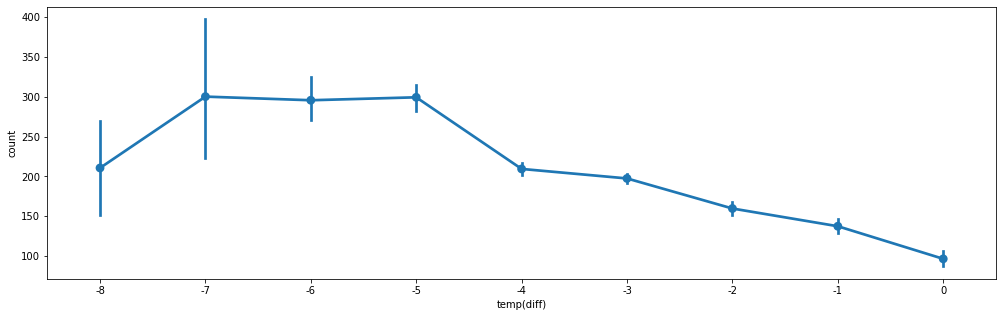

In [386]:
# code를 적으세요.
plt.figure(figsize=(17,5))
sns.pointplot(data=train, x='temp(diff)', y='count')

9. 연도 별로 아래 그래프를 도출해보세요. 2011년이 일부분만 나옵니다. 없는 이유는 test 데이터에서 계산해야될 값들이기 때문입니다.
![문제9](문제9.jpg)

<AxesSubplot:xlabel='temp(diff)', ylabel='count'>

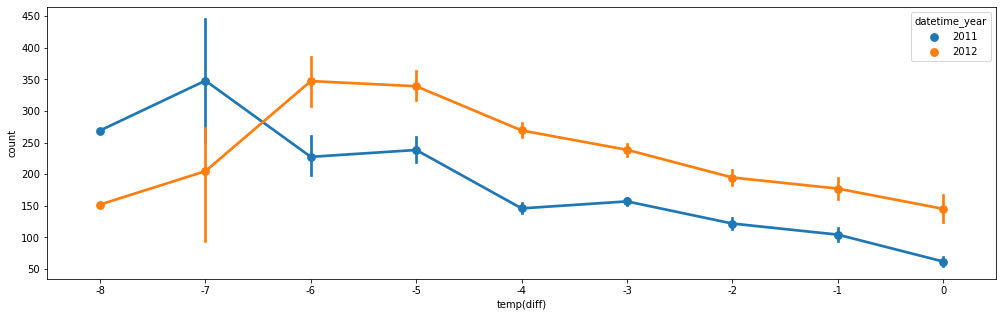

In [387]:
# code를 적으세요.
plt.figure(figsize=(17,5))
sns.pointplot(data=train, x='temp(diff)', y='count', hue='datetime_year')

9-2. train의 컬럼을 아래와 같이 도출해보세요.
![문제9-2](문제9-2.jpg)

In [388]:
# code를 적으세요.
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'datetime_year', 'datetime_month', 'datetime_day', 'datetime_hour',
       'datetime_minute', 'datetime_second', 'datetime_weekday', 'weekday',
       'windspeed_int', 'THI', 'THI_1', 'THI_2', 'THI_3', 'THI_4', 'THI_type',
       'temp(diff)'],
      dtype='object')

9-3. train의 컬럼을 활용해서 새로운 dataframe을 만드는데 아래의 컬럼만 나오도록 만드세요.
![문제9-3](문제9-3.jpg)

In [389]:
# code를 적으세요.
train_df = train[['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'datetime_year', 'datetime_month', 'datetime_day', 'datetime_hour', 
                'THI', 'THI_type', 'temp(diff)','casual', 'registered', 'count']]
train_df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'datetime_year', 'datetime_month',
       'datetime_day', 'datetime_hour', 'THI', 'THI_type', 'temp(diff)',
       'casual', 'registered', 'count'],
      dtype='object')

10. 위 dataframe 데이터를 활용하여 아래와 같은 heatmap을 도출해보세요.
![문제10](문제10.jpg)

<AxesSubplot:>

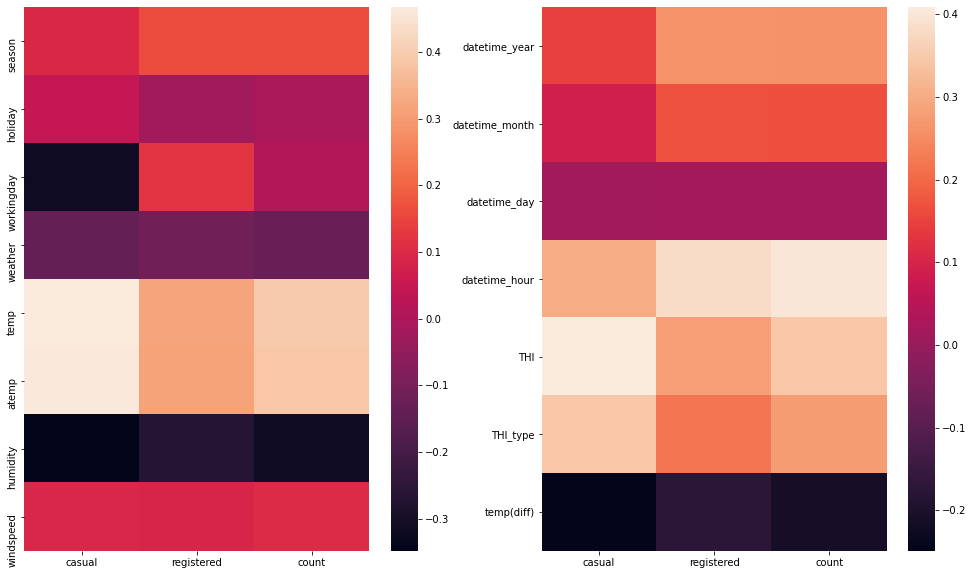

In [390]:
# code를 적으세요.
figure,(ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(17,10)
sns.heatmap(train_df.corr().loc["season":"windspeed", "casual":"count"], ax=ax1)
sns.heatmap(train_df.corr().loc["datetime_year":"temp(diff)", "casual":"count"], ax=ax2)

- 마이너스는 음의 성향을 가진다. 0일 때 상관성이 떨어지고, + 혹은 - 로 가까워질수록 상관성이 높아진다.
- 1이나 -1에 가까울 수록 상관성이 높다. 그 말은 즉 0에 가까울수록 상관성이 없다.

11. heatmap에서 count와 temp(diff)간 상관성이 적어 보입니다. boxplot으로 아래와 같이 도출해서 왜 그런지 생각해봅시다. 
![문제11](문제11.jpg)

<AxesSubplot:xlabel='temp(diff)', ylabel='count'>

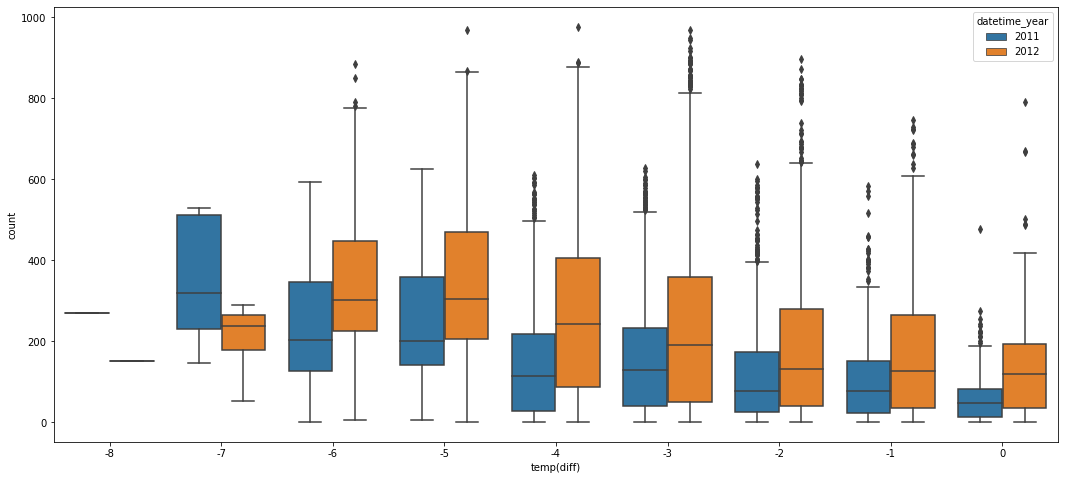

In [391]:
# code를 적으세요.
plt.figure(figsize=(18,8))
sns.boxplot(data=train, x='temp(diff)', y='count', hue='datetime_year')

<AxesSubplot:xlabel='temp(diff)', ylabel='count'>

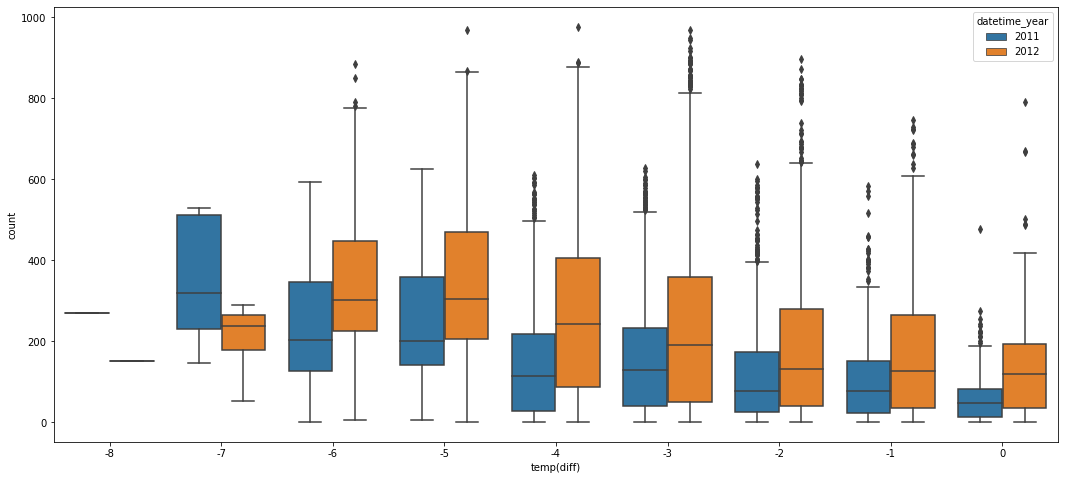

In [392]:
plt.figure(figsize=(18,8))
sns.boxplot(data=train, x='temp(diff)', y='count', hue='datetime_year')

<AxesSubplot:xlabel='temp(diff)', ylabel='count'>

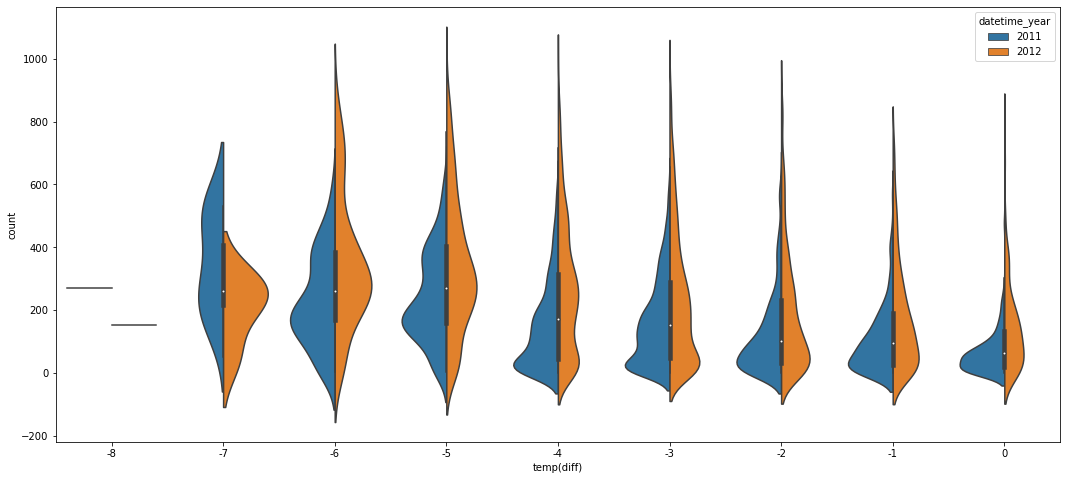

In [393]:
plt.figure(figsize=(18,8))
sns.violinplot(data=train, x='temp(diff)', y='count', hue='datetime_year', split=True)